# Tests

In [10]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [11]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [12]:
R.<x,y> = RIF[]

In [13]:
system = System(
    R,
    (x,y),
    [(1,2), (3,4)],
    [
        -y,
        x,
    ],
)

In [14]:
atomic = Atomic(x)

In [15]:
initials = [RIF(1, 2), RIF(3, 4)]

In [16]:
from ulbc.context_signals import *
from ulbc.reach_trees import gen_sub_space_domains

In [17]:
from ulbc.tests.test_context_signals import sin_cos_solution

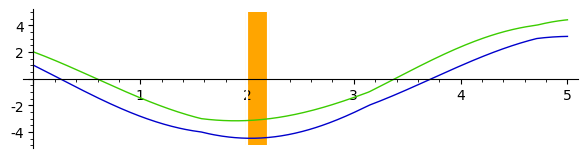

In [32]:
p1 = plot(
    (lambda t: sin_cos_solution(*initials, t)[0].lower(),
     lambda t: sin_cos_solution(*initials, t)[0].upper()),
    (0, 5),
);
p2 = p1 + region_plot(lambda t, _: t in RIF(2,2.2), (0, 5), (-5, 5), incol="orange")
p2.set_aspect_ratio(1/8)
p2

In [33]:
jump_domain = sin_cos_solution(*initials, RIF(2, 2.2)); jump_domain

(-1.?e1, 0.?e1)

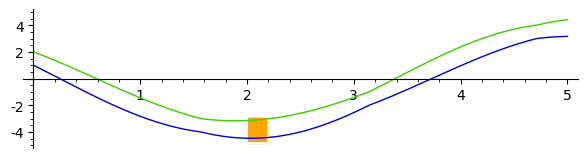

In [34]:
p3 = p1 + region_plot(lambda t, y: t in RIF(2,2.2) and y in jump_domain[0], (0, 5), (-5, 5),
                      incol='orange')
p3.set_aspect_ratio(1/8)
p3

In [51]:
domain_post_jump = list(vector(jump_domain) + vector([RIF(0), RIF(4, 6)]))

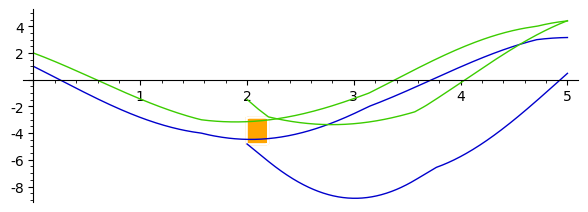

In [52]:
p5 = p3 + plot(
    (lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[0].lower(),
     lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[0].upper()),
    (2, 5),
)
p5

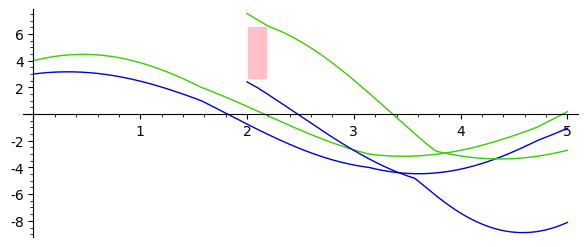

In [53]:
p = plot(
    (lambda t: sin_cos_solution(*initials, t)[1].lower(),
     lambda t: sin_cos_solution(*initials, t)[1].upper()),
    (0, 5),
) + region_plot(
    (lambda t, y: t in RIF(2,2.2) and y in domain_post_jump[1]),
    (0,5),
    (-4,7),
    incol='pink',
) + plot(
    (lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[1].lower(),
     lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[1].upper()),
    (2, 5),
)
p.set_aspect_ratio(1/8)
p

In [56]:
def sin_cos_solution_after_jump(T, jump):
    jump_domain = vector(sin_cos_solution(*initials, T))
    after_jump = jump_domain + jump
    return lambda t: sin_cos_solution(*after_jump, t)

In [60]:
import ulbc.interval_signals as interval_signals

In [63]:
def sin_cos_signal_after_jump(T, jump, epsilon=0.1):
    sol = sin_cos_solution_after_jump(T, jump)
    atomic_sig = interval_signals.to_signal_bisection(
        lambda t: sol(t)[0] + 0.5,
        RIF(0,5),
        epsilon,
    )
    return atomic_sig.G(RIF(pi/8))

In [65]:
sig = sin_cos_signal_after_jump(RIF(2,2.2), vector([RIF(0), RIF(2,2.2)]), 0.1)
sig

Signal([0.0000000000000000 .. 4.6073009183012755], [([0.0000000000000000 .. 1.0916759183012759], False), ([1.8729259183012758 .. 4.4510509183012755], True)], mask=None)

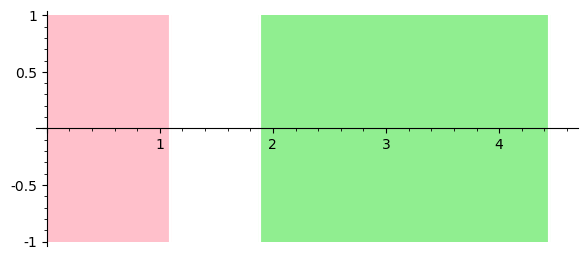

In [66]:
sig.plot()

In [72]:
def ctx_signal_from_solution(T, jump, steps, epsilon):
    T = RIF(T)
    Tmin, Tmax = T.edges()
    step = (Tmax - Tmin)/RIF(steps)
    def sig_value(T):
        return sin_cos_signal_after_jump(T, jump, epsilon)(0)
    
    return Signal(
        T,
        [(Tk := RIF(Tmin + k*step, Tmin + (k+1)*step), sig_value(Tk))
         for k in range(steps)]
    )

In [86]:
csig = ctx_signal_from_solution(
    (0,2*pi),
    vector([RIF(0), RIF(1, 5)]),
    100,
    0.01,
); csig

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.31415926535897931 .. 2.8902652413026107], False), ([3.8955748904513436 .. 5.5920349233898339], True)], mask=None)

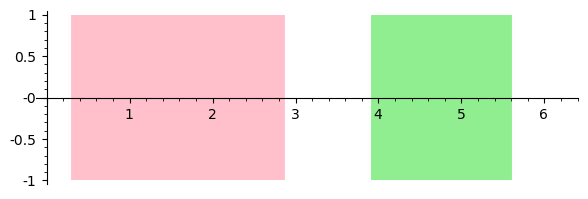

In [87]:
csig.plot()

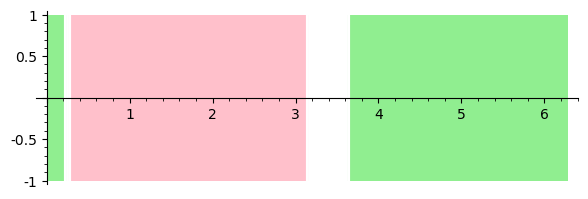

In [81]:
expected = Signal(
    RIF(0.0000000000000000, 6.2831853071795872),
    [(RIF(0.0000000000000000 , 0.19638079084936209), True),
     (RIF(0.29457118627404310, 3.1420926535897933 ), False),
     (RIF(3.6330446307131989 , 6.2831853071795872 ), True)],
)
expected.plot()

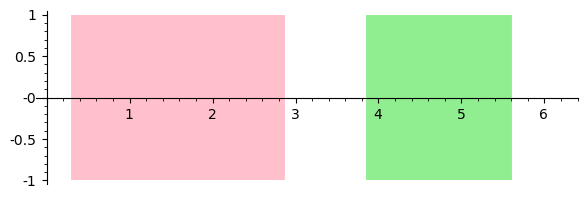

In [85]:
res.plot()

In [82]:
prop = ({var("y"): RIF(1, 5)}
                >> G(RIF(sage.pi/8), Atomic(var("x") + 0.5)))

In [84]:
res = prop.signal_for_system(system,  2*sage.pi, epsilon_ctx=0.01)

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y}))
Computed 63 flowpipes in 0.04635250201681629 sec
mask = None
phi variables sfs = {x}
system sfs = System(R, (x, y), [[-4.5264988148012977 .. 4.5309838285159448], [-4.5294495737230332 .. 4.5304673567368976]], (-y, x), varmap=bidict({'x': x, 'y': y}))
Computed 4 flowpipes in 0.009506886068265885 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7f2dbfde3bf0>, -y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -y
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39869908169772423]]
domain = [0.0000000000000000 .. 0.39869908169872421]
roots = [[0.0000000000000000 .. 0.39869908169772423]]
seg_domain = [0.0000000000000000 .. 0.39869908169872421]
roots = [[0.0000000000000000 ..

In [19]:
r = system.with_y0(physical_subdomain).reach(5, step=(0.001, 0.1), order=10)

NameError: name 'physical_subdomain' is not defined

In [ ]:
p2.set_aspect_ratio(1/8)
p2


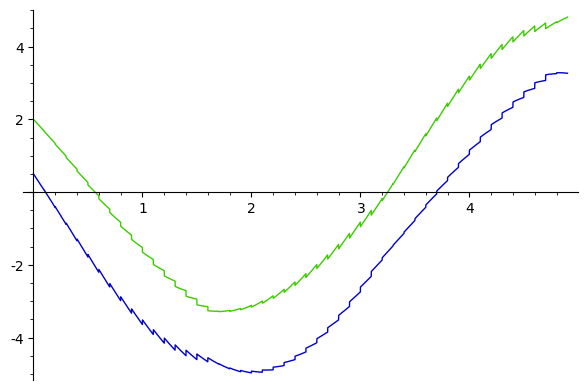

In [48]:
p2 = plot((lambda t: r(t)[0].lower(),
           lambda t: r(t)[0].upper()), (0, 4.9))
p2

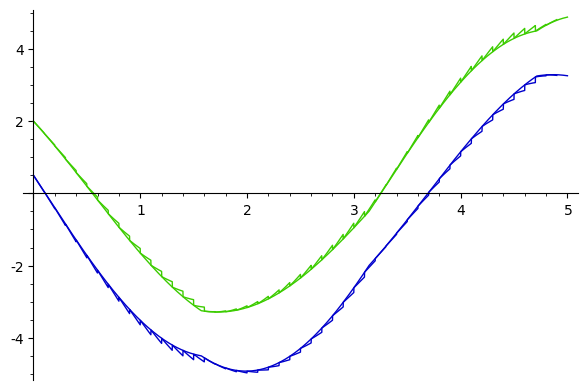

In [49]:
p1 + p2

In [50]:
explicitly_computed_signal = interval_signals.to_signal(
    lambda t: sin_cos_solution(*physical_subdomain, t)[0],
    lambda t: -sin_cos_solution(*physical_subdomain, t)[1],
    RIF(0, 5),
)
explicitly_computed_signal

domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.11065496180530458 .. 0.11065596180530459], 
 [0.11165596180530458 .. 0.55166863210689010], 
 [3.2522485553989626 .. 3.2522495553989628], 
 [3.2532495553989630 .. 3.6932569390386707]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = []
signal given bool roots: 1 items in 0.08 seconds


Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 5.0000000000000000], False)], mask=None)

In [51]:
explicitly_computed_signal = interval_signals.to_signal_bisection(
    lambda t: sin_cos_solution(*physical_subdomain, t)[0],
    RIF(0, 5),
)
explicitly_computed_signal

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.078125000000000000], True), ([0.62500000000000000 .. 3.2031250000000000], False), ([3.7500000000000000 .. 5.0000000000000000], True)], mask=None)